In [176]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [177]:
df = pd.read_csv('sign_mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [178]:
#Splitting Features (pixel values) and Target Varaible (label)
X = df.drop('label', axis=1)
y = df['label']

In [179]:
#Scaling the Pixel Data to range from 0 to 1
X = X/255.0
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961


In [180]:
#Scaling the Pixel Data to range from 0 to 1
scalar = MinMaxScaler()
scalar.fit(X)
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961


In [181]:
# Reshape features into 28x28 images
X = X.values.reshape(-1, 1, 28, 28)
print(X.shape)

(27455, 1, 28, 28)


In [182]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [183]:
# Convert pandas DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create TensorDataset objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define training data loader
def train_loader(batch_size=64, shuffle=True):
    return DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)

# Define testing data loader
def test_loader(batch_size=64, shuffle=False):
    return DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)

In [184]:
class SignLanguageCNN(nn.Module):
    def __init__(self):
        super(SignLanguageCNN, self).__init__()
        # First Convolutional Layer
        # First set of filters
        self.conv1_edges = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        # Second set of filters
        self.conv1_textures = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5, stride=1, padding=2)

        # Second Convolutional Layer
        # First set of filters
        self.conv2_pattern = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        # Second set of filters
        self.conv2_scale_rotation = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        # Third set of filters
        self.conv2_higher_level = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

        # Activation Function
        self.relu = nn.ReLU()

        # Max Pooling Layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Dropout Layer
        self.dropout = nn.Dropout(p=0.2)

        # Fully Connected Layer
        self.fc1 = nn.Linear(32 * 14 * 14, 128)

        # Output Layer
        self.fc2 = nn.Linear(128, 26)  # 26 classes for each sign language letter

    def forward(self, x):
        # First Convolutional Layer
        edges_features = self.conv1_edges(x)
        textures_features = self.conv1_textures(x)
        x = edges_features + textures_features
        x = self.relu(x)
        x = self.pool(x)

        # Second Convolutional Layer
        pattern_features = self.conv2_pattern(x)
        scale_rotation_features = self.conv2_scale_rotation(x)
        higher_level_features = self.conv2_higher_level(x)
        x = pattern_features + scale_rotation_features + higher_level_features
        x = self.relu(x)
        x = self.pool(x)

        # Flatten
        x = x.view(-1, 32 * 14 * 14)

        # Fully Connected Layer
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Output Layer
        x = self.fc2(x)
        return x

# Create an instance of the SignLanguageCNN model
model = SignLanguageCNN()
print(model)

SignLanguageCNN(
  (conv1_edges): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_textures): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_pattern): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_scale_rotation): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_higher_level): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=6272, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=26, bias=True)
)


In [185]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define Adam optimizer
optimizer = optim.Adam(model.parameters())

# Create DataLoader objects
train_loader = train_loader(batch_size=64, shuffle=True)
test_loader = test_loader(batch_size=64, shuffle=False)

# Training function
def train_model(model, criterion, optimizer, num_epochs=10):
    train_losses = []
    test_losses = []
    train_accuracy = []
    test_accuracy = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            # Calculate accuracy for training data
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Evaluation phase
        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            test_loss = test_loss / len(test_loader.dataset)
            test_losses.append(test_loss)
            accuracy = 100 * correct / total
            test_accuracy.append(accuracy)

        # Print epoch statistics
        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Training Loss: {epoch_loss:.4f}, '
              f'Testing Loss: {test_loss:.4f}, '
              f'Testing Accuracy: {accuracy:.2f}%')

    return train_losses, test_losses, test_accuracy

# Train the model
train_losses, test_losses, test_accuracy = train_model(model, criterion, optimizer)

Epoch 1/10, Training Loss: 1.4592, Testing Loss: 0.2543, Testing Accuracy: 92.90%
Epoch 2/10, Training Loss: 0.2505, Testing Loss: 0.0543, Testing Accuracy: 99.13%
Epoch 3/10, Training Loss: 0.1036, Testing Loss: 0.0239, Testing Accuracy: 99.64%
Epoch 4/10, Training Loss: 0.0638, Testing Loss: 0.0055, Testing Accuracy: 100.00%
Epoch 5/10, Training Loss: 0.0396, Testing Loss: 0.0031, Testing Accuracy: 100.00%
Epoch 6/10, Training Loss: 0.0348, Testing Loss: 0.0025, Testing Accuracy: 99.98%
Epoch 7/10, Training Loss: 0.0266, Testing Loss: 0.0015, Testing Accuracy: 100.00%
Epoch 8/10, Training Loss: 0.0267, Testing Loss: 0.0020, Testing Accuracy: 99.98%
Epoch 9/10, Training Loss: 0.0192, Testing Loss: 0.0004, Testing Accuracy: 100.00%
Epoch 10/10, Training Loss: 0.0240, Testing Loss: 0.0012, Testing Accuracy: 100.00%


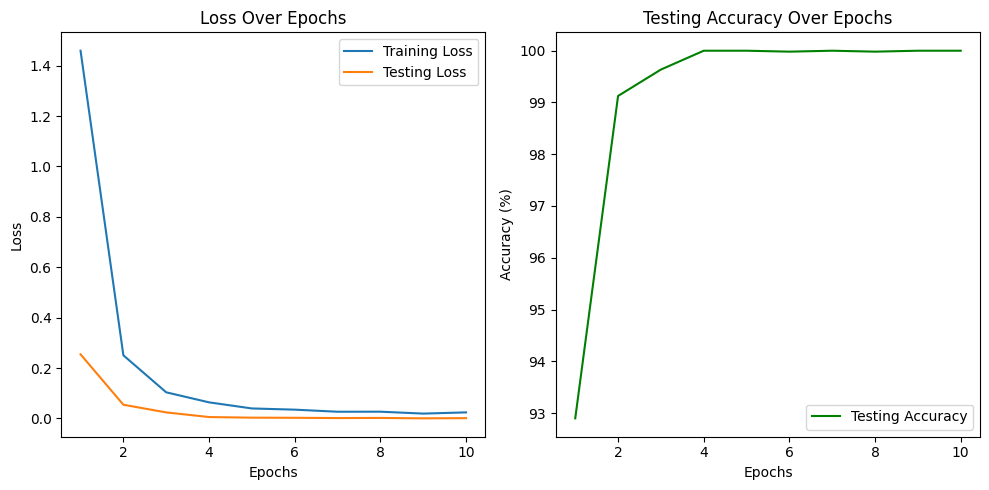

In [186]:
# Plot loss and accuracy over epochs
epochs = np.arange(1, 11)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, test_losses, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, test_accuracy, label='Testing Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Testing Accuracy Over Epochs')
plt.legend()
plt.tight_layout()
plt.show()

In [187]:
from torchsummary import summary
!pip install torchviz
from torchviz import make_dot

# Print model summary
summary(model, input_size=(1, 28, 28))  # Assuming input size is (1, 28, 28)

# Visualize model architecture
x = torch.zeros(1, 1, 28, 28)  # Create a dummy input tensor
dot = make_dot(model(x), params=dict(model.named_parameters()))
dot.render("model", format="png")  # Save the visualization as a PNG file

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached 

'model.png'